In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_tumor_data_features.csv')


In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc_X = sc.fit_transform(df)

In [4]:
sc_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Scikit-Learn Implementation

In [5]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)

In [30]:
p_components = pca.fit_transform(sc_X)


Text(0, 0.5, 'PC 2')

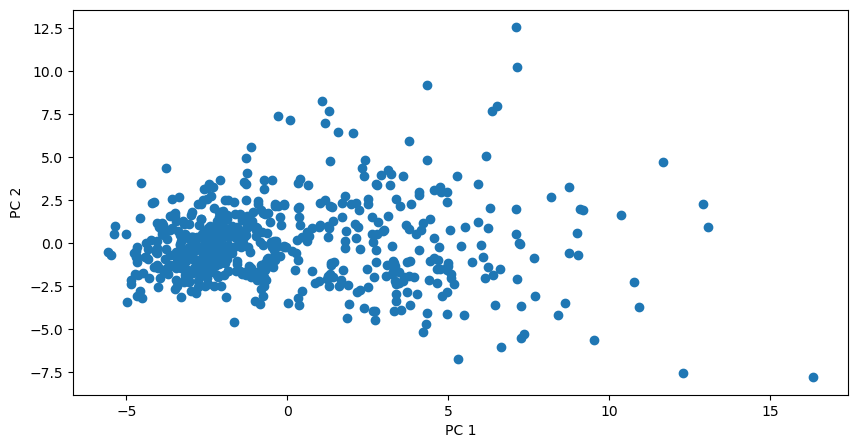

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(p_components[:,0],p_components[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')

## Model Attributes

In [32]:
pca.n_components

2

In [33]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [34]:
pca.components_.shape

(2, 30)

In [35]:
df_comp = pd.DataFrame(pca.components_, index=['PC1','PC2'],columns=df.columns)

<Axes: >

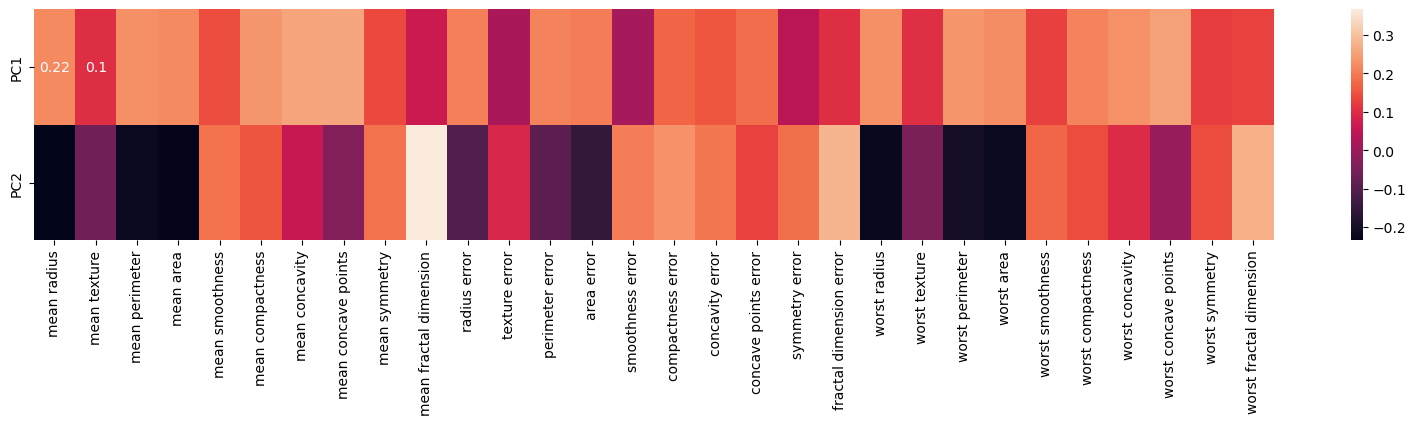

In [36]:
plt.figure(figsize=(20,3))
sns.heatmap(df_comp, annot=True)

In [37]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [38]:
np.sum(pca.explained_variance_ratio_)

0.6324320765155952

In [39]:
explained_var = []

for n in range(1,31):
    pca = PCA(n_components=n)
    pca.fit(sc_X)
    
    explained_var.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Variance Explained')

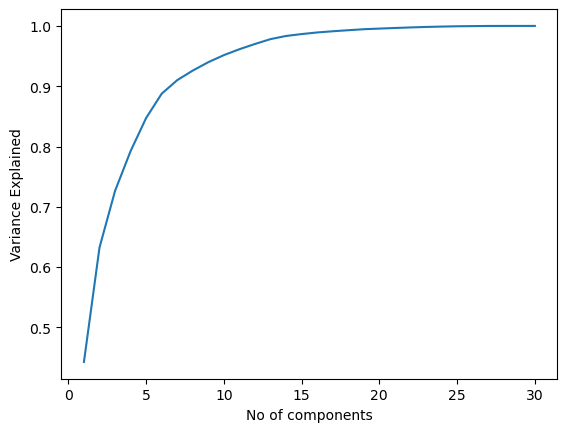

In [41]:
plt.plot(range(1,31),explained_var)
plt.xlabel('No of components')
plt.ylabel('Variance Explained')